In [27]:
import numpy as np
import matplotlib.pyplot as plt

Mean relative error (RK4): 79.64%
Mean relative error (Finite Differences): 83.42%
Maximum relative error (RK4): 99.57%
Maximum relative error (Finite Differences): 100.00%


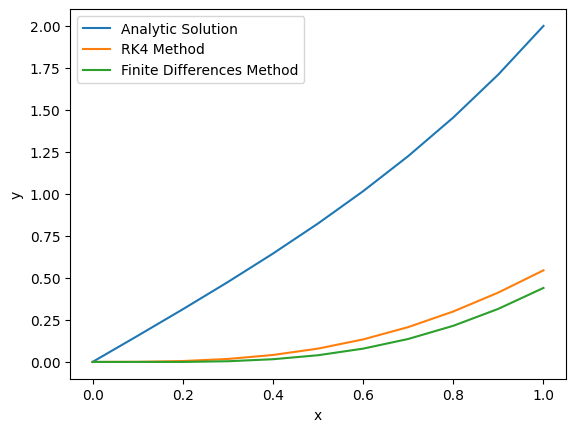

In [28]:
# Constants
a = 0
b = 1
y0 = 0
y1 = 2
h = 0.1

# Analytic Solution
def y_analytic(x):
    return ((np.exp(2)) * (np.exp(4) - 1)**(-1)) * (np.exp(2*x) - np.exp(-2*x)) + x

# RK4 Method
def rk4(x, y, h, f):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return x + h, y + (k1 + 2*k2 + 2*k3 + k4) / 6

def f(x, y):
    return np.array([y[1], -4*(y[0]-x)])

# Finite Difference Method
def finite_difference(x, y, h, f):
    y_new = y + h * f(x, y)
    return x + h, y_new

def f_fd(x, y):
    return np.array([y[1], -4*y[0] + 4*x])

# Calculate solutions
x_rk4 = np.arange(a, b+h, h)
y_rk4 = np.zeros((len(x_rk4), 2))
y_rk4[0] = [y0, 0]
for i in range(1, len(x_rk4)):
    x_rk4[i], y_rk4[i] = rk4(x_rk4[i-1], y_rk4[i-1], h, f)
    
x_fd = np.arange(a, b+h, h)
y_fd = np.zeros((len(x_fd), 2))
y_fd[0] = [y0, 0]
for i in range(1, len(x_fd)):
    x_fd[i], y_fd[i] = finite_difference(x_fd[i-1], y_fd[i-1], h, f_fd)

# Calculate errors
y_analytic_values = y_analytic(x_rk4)
error_rk4 = np.abs(y_analytic_values - y_rk4[:,0])
error_fd = np.abs(y_analytic_values - y_fd[:,0])

# Mean and Maximum relative error
y_analytic_values += 1e-12  # Add small constant to avoid division by zero

mean_error_rk4 = np.mean(np.abs(error_rk4) / y_analytic_values) * 100
mean_error_fd = np.mean(np.abs(error_fd) / y_analytic_values) * 100

max_error_rk4 = np.max(np.abs(error_rk4) / y_analytic_values) * 100
max_error_fd = np.max(np.abs(error_fd) / y_analytic_values) * 100

print("Erro relativo médio (RK4): {:.2f}%".format(mean_error_rk4))
print("Erro relativo médio (Diferenças finitas): {:.2f}%".format(mean_error_fd))
print("Erro relativo máximo (RK4): {:.2f}%".format(max_error_rk4))
print("Erro relativo máximo (Diferenças finitas): {:.2f}%".format(max_error_fd))
# Plot solutions
plt.plot(x_rk4, y_analytic_values, label="Analytic Solution")
plt.plot(x_rk4, y_rk4[:,0], label="RK4 Method")
plt.plot(x_fd, y_fd[:,0], label="Finite Differences Method")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [29]:
mean_error_rk4 = np.mean(error_rk4 / y_analytic_values) * 100
mean_error_fd = np.mean(error_fd / y_analytic_values) * 100
max_error_rk4 = np.max(error_rk4 / y_analytic_values) * 100
max_error_fd = np.max(error_fd / y_analytic_values) * 100

print("Erro relativo médio (RK4): {:.2f}%".format(mean_error_rk4))
print("Erro relativo médio (Diferenças finitas): {:.2f}%".format(mean_error_fd))
print("Erro relativo máximo (RK4): {:.2f}%".format(max_error_rk4))
print("Erro relativo máximo (Diferenças finitas): {:.2f}%".format(max_error_fd))

Erro relativo médio (RK4): 79.64%
Erro relativo médio (Diferenças finitas): 83.42%
Erro relativo máximo (RK4): 99.57%
Erro relativo máximo (Diferenças finitas): 100.00%
